***Goal:***
*load the titanic dataset and inspect its structure, missing values, and data types.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sas

titanic = pd.read_csv('Titanic-Dataset.csv')
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
print("=== Data types ===")
print(titanic.dtypes)

=== Data types ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
print(titanic.isnull().sum())#this wil print total numbe rof null values in each coloumn in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Handle Missing Values**

In [4]:
print(titanic.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\kalya\AppData\Local\Temp\ipykernel_11800\2184073557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [6]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace = True)

C:\Users\kalya\AppData\Local\Temp\ipykernel_11800\1059360808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace = True)


In [7]:
if 'Cabin' in titanic.columns:
    titanic.drop('Cabin', axis=1, inplace=True)
    print("'Cabin' column dropped (as it is has too many missing values).")
else:
    print(" 'Cabin' column already missing. Proceeding...")

print("\n=== Updated Columns ===")
print(titanic.columns.tolist())

'Cabin' column dropped (as it is has too many missing values).

=== Updated Columns ===
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [8]:
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Converting categeorical features in to Numericals**

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le =LabelEncoder()
titanic['Sex'] =le.fit_transform(titanic['Sex'])
print(titanic['Sex'].unique())

[1 0]


**One-hot encoding for "Embark" coloumn (Multy-Categorical)**

In [11]:
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.drop('Embarked', axis=1, inplace=True)

In [12]:
print(titanic.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


**Feature Scaling (Normalization/Standardization)**

In [15]:
from sklearn.preprocessing import StandardScaler

In [18]:
numerical_cols =['Age','Fare','SibSp','Parch']
scaler = StandardScaler() #Transforms data to have mean=0 and std=1

titanic[numerical_cols] = scaler.fit_transform(titanic[numerical_cols])
print(titanic[numerical_cols].describe().round(2))


          Age    Fare   SibSp   Parch
count  891.00  891.00  891.00  891.00
mean    -0.00    0.00    0.00    0.00
std      1.00    1.00    1.00    1.00
min     -2.22   -0.65   -0.47   -0.47
25%     -0.57   -0.49   -0.47   -0.47
50%     -0.10   -0.36   -0.47   -0.47
75%      0.43   -0.02    0.43   -0.47
max      3.89    9.67    6.78    6.97


**Outlier Handling (Optional**

<function matplotlib.pyplot.show(close=None, block=None)>

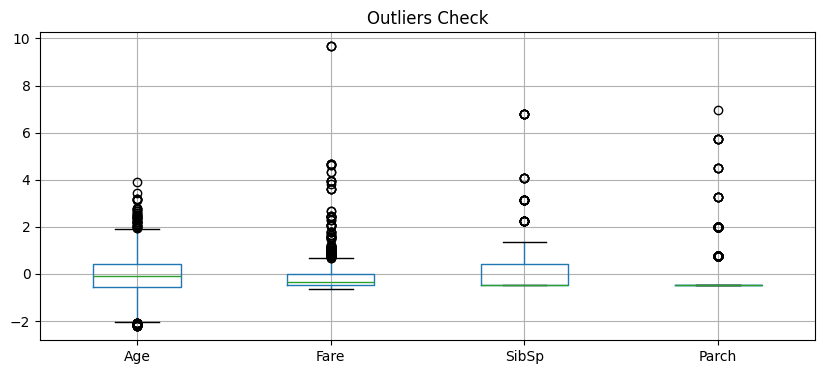

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
titanic[numerical_cols].boxplot()
plt.title("Outliers Check")
plt.show

In [24]:
titanic.to_csv('titanic_preprocessed.csv',index =False)

**Final Processed Data**

In [25]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861  0.432793   
2                             Heikkinen, Miss. Laina    0 -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312  0.432793   
4                           Allen, Mr. William Henry    1  0.433312 -0.474545   

      Parch            Ticket      Fare  Embarked_C  Embarked_Q  Embarked_S  
0 -0.473674         A/5 21171 -0.502445       False       False        True  
1 -0.473674          PC 17599  0.786845        True       False       False  
2 -0.473674  STON/O2. 3101282 -0.488854       False       Fals